In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# Load Data
dn = pd.read_csv("Data/de_novo_proteins_data.csv", index_col=0)
dn=dn[(dn["mechanism"] == "denovo") | (dn["mechanism"] == "denovo-intron")]

est = pd.read_csv("Data/established_proteins_data.csv", index_col=0)
est = est[est["isDeNovo"] == False]

rd = pd.read_csv("Data/random_sequences_data.csv", index_col=0)

In [39]:
def calculate_amino_acid_frequencies(sequence):
    amino_acids = {}
    total_count = 0

    # Count the occurrences of each amino acid
    for aa in sequence:
        if aa in amino_acids:
            amino_acids[aa] += 1
        else:
            amino_acids[aa] = 1
        total_count += 1

    # Calculate the frequencies
    frequencies = {}
    for aa, count in amino_acids.items():
        frequency = count / total_count
        frequencies[aa] = frequency

    return frequencies

In [40]:
# Calculate the amino acid frequencies
dn_frequencies = dn["sequence"].apply(calculate_amino_acid_frequencies)
est_frequencies = est["sequence"].apply(calculate_amino_acid_frequencies)
rd_frequencies = rd["sequence"].apply(calculate_amino_acid_frequencies)

In [41]:
# Create a combined dataframe for all three datasets
dn_frequencies = pd.DataFrame(dn_frequencies.tolist(), index=dn_frequencies.index)
dn_frquencies = dn_frequencies.fillna(0)

est_frequencies = pd.DataFrame(est_frequencies.tolist(), index=est_frequencies.index)
est_frequencies = est_frequencies.drop(columns=["X"])
est_frequencies = est_frequencies.fillna(0)

rd_frequencies = pd.DataFrame(rd_frequencies.tolist(), index=rd_frequencies.index)
rd_frequencies = rd_frequencies.fillna(0)

dn_frequencies["type"] = r"$\it{de}$ $\it{novo}$ Proteins"
est_frequencies["type"] = "Conserved Proteins"
rd_frequencies["type"] = "Random Sequences"

df = pd.concat([dn_frequencies, est_frequencies, rd_frequencies])

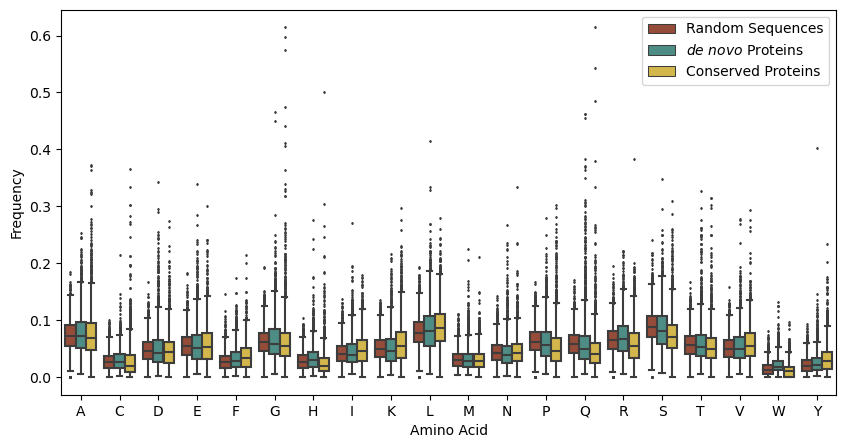

In [49]:
# plot the data
fig, ax = plt.subplots(figsize=(10, 5))

palette = sns.color_palette(palette=["#A44328","#43978D", "#EAC435"])
sns.boxplot(data=df.melt(id_vars="type").sort_values("variable"), x="variable", y="value", hue="type", ax=ax, fliersize=1, palette=palette)
ax.set_xlabel("Amino Acid")
ax.set_ylabel("Frequency")

l = ax.get_legend()
l.set_title(None)
